# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Feb 2nd, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: A good man

Student ID: 

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). Download it using the cell below:

In [1]:
'''
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
'''
from sklearn.datasets import load_diabetes
import sklearn
import numpy as np
import matplotlib.pyplot as plt
dataset = load_diabetes()


## Part 1: Getting started [2.5 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 10
* Determine the median target value. 140.5
* How many participants have a target value greater than the median target value? 221

Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as "diabetes severity below median" or "diabetes severity above median". **[0.5]**

In [2]:
import pandas as pd
# check data entry 
#print(dataset['data'])
# check target entery
#print(dataset['target'])
#check feature_names entry
#print(dataset['feature_names'])
# create pandas dataframe
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
print(df)

#check number of features
print(f"Number of features: {len(dataset['feature_names'])}")
#get the median value of target
print(f"The median value of target: { df['target'].median()}")
#check the number of people with target value > median target value
#method 1:use a loop
target_median = df['target'].median()
counter = 0
for row in df.iterrows():
  if row[1]['target'] > target_median:
    counter += 1
  else:
    pass
print(f"Number of participants with target value > median target value: {counter}")
#method2: no loops, select a subset of original dataframe based on target values
df2 = df[df['target'] > target_median]
print(f"Number of participants with target value > median target value: {len(df2)}")

#add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median)
# We will call the new column 'label'
df['label'] = (df['target'] > target_median) * 1
df['label']

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019908 -0.0176

0      1
1      0
2      1
3      1
4      0
      ..
437    1
438    0
439    0
440    1
441    0
Name: label, Length: 442, dtype: int64

In [3]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,1
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0,0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0,0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0,1


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [4]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target', 'label'])# X contains all features
y = df['label']# y contains all labels
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#combine x_train and y_train into Train Dataset
train_dataset = x_train.copy()
train_dataset['label'] = y_train

#combine x_test and y_test into Test Dataset
test_dataset = x_test.copy()
test_dataset['label'] = y_test
print(train_dataset)
print(test_dataset)


          age       sex       bmi        bp        s1        s2        s3  \
232  0.012648  0.050680  0.000261 -0.011409  0.039710  0.057245 -0.039719   
224 -0.027310 -0.044642 -0.066563 -0.112400 -0.049727 -0.041397  0.000779   
252  0.005383 -0.044642  0.059541 -0.056166  0.024574  0.052861 -0.043401   
254  0.030811  0.050680  0.056307  0.076958  0.049341 -0.012274 -0.036038   
418  0.009016 -0.044642 -0.024529 -0.026328  0.098876  0.094196  0.070730   
..        ...       ...       ...       ...       ...       ...       ...   
323  0.070769  0.050680 -0.007284  0.049415  0.060349 -0.004445 -0.054446   
192  0.056239  0.050680 -0.030996  0.008101  0.019070  0.021233  0.033914   
117  0.059871 -0.044642 -0.021295  0.087287  0.045213  0.031567 -0.047082   
47  -0.078165 -0.044642 -0.073030 -0.057314 -0.084126 -0.074277 -0.024993   
172  0.041708  0.050680  0.071397  0.008101  0.038334  0.015909 -0.017629   

           s4        s5        s6  label  
232  0.056081  0.024053  0.03205

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``age``, the y-axis is ``bmi,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**


Ans:
The values of x and y axis are different. The variances of the two features are also different. They look similar because the original dataset (diabetes dataset) has already been standardized. The advantage of standardization is to make sure that all the features contribute equally to the model optimization and fitting. By setting the mean to 0 and variance to 1, we can avoid features with larger scale dominating the optimization process.

-3.6396225400041895e-16 0.04761904761904939
-8.013951493363262e-16 0.04761904761905211
-1.607562750588462e-17 1.0
-3.6170161888240395e-17 0.9999999999999999


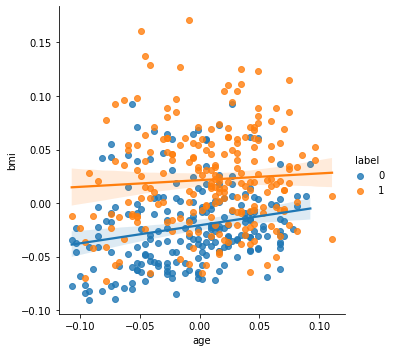

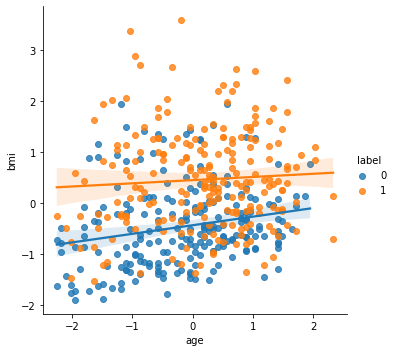

In [5]:
### YOUR CODE HERE ###
import seaborn as sns
plot_before_standardize = sns.lmplot(data = df,x="age", y='bmi',hue='label')

df_standardized = df.copy() # create a copy of df
#standardize features 'age' and 'bmi'
df_standardized['age'] =(df_standardized['age'] - df_standardized['age'].mean()) / df_standardized['age'].std()
df_standardized['bmi'] =(df_standardized['bmi'] - df_standardized['bmi'].mean()) / df_standardized['bmi'].std()

#replot with standardized features
plot_after_standardize = sns.lmplot(data = df_standardized,x="age", y='bmi',hue='label')

# check if the original dataset features (bmi and age) has already been standardized
print(df['age'].mean(), df['age'].std())
print(df['bmi'].mean(), df['bmi'].std())

#check if we have succesfully standardized the two features
print(df_standardized['age'].mean(), df_standardized['age'].std())
print(df_standardized['bmi'].mean(), df_standardized['bmi'].std())



## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a diabetes severity that is less than the median or greater than the median. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**

Ans:
1. Please see the graph below.
2. The best k = 15, highest cross-validation acucuracy = 0.7542570068746695
3. Overfit happens when k is too small, in this case, we can see that the training accuracy is very high but the validation accuracy is low. Underfit happens when k is too large, in this case, both training accuracy and validation accuracy is low. We can find the range for overfitting by observing if there is a large gap between train and validation accuracy with a higher training accuracy and the range for underfitting by observing when both the training and validation accuracy are low.
Therefore by observing the training and validation curves, approximately when k is [1,10], the model is overfitted and when k is [45,100], the model is underfitted.


In [6]:
### YOUR CODE HERE ###
from sklearn.model_selection import cross_validate
from sklearn import neighbors

k_values = []
train_accuracy = []
valid_accuracy = []
for i in range (1,101):
  k_values.append(i)
# create knn and fit the data
for k in k_values:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn, x_train, y_train, cv=5, return_train_score=True)
  train_accuracy.append(scores['train_score'].mean())
  valid_accuracy.append(scores['test_score'].mean())

# find the best cross-validation accuracy and its corresponding k
best_valid_accu = max(valid_accuracy)
best_k = valid_accuracy.index(best_valid_accu) + 1 # since k = index + 1
print(f"When k = {best_k}, the highest cross-validation accuracy is {best_valid_accu}")

When k = 15, the highest cross-validation accuracy is 0.7542570068746695


Text(0, 0.5, 'Cross-validation Accuracy')

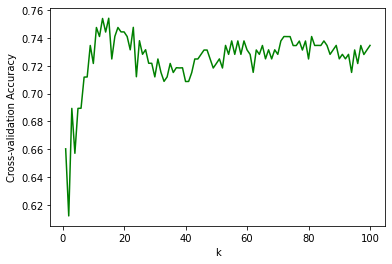

In [7]:
#plot mean cross-validation accuracy vs k
import matplotlib.pyplot as plt

plt.plot(k_values, valid_accuracy, color = 'green')
plt.xlabel("k")
plt.ylabel('Cross-validation Accuracy')


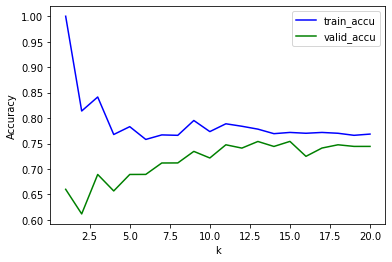

In [8]:
#find the range for overfit
plt.plot(k_values[0:20], train_accuracy[0:20], color = 'blue',label = 'train_accu')
plt.plot(k_values[0:20], valid_accuracy[0:20], color = 'green',label = 'valid_accu')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

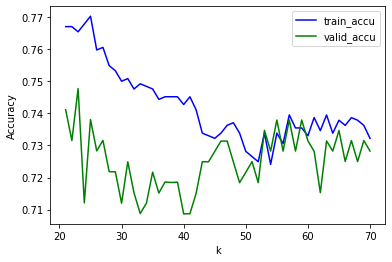

In [9]:
#find the range for underfit
plt.plot(k_values[20:70], train_accuracy[20:70], color = 'blue',label = 'train_accu')
plt.plot(k_values[20:70], valid_accuracy[20:70], color = 'green',label = 'valid_accu')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

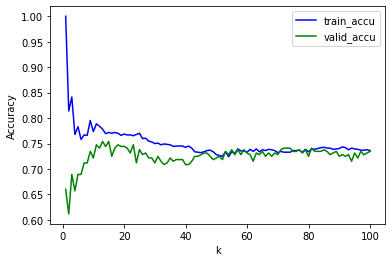

In [10]:
#plot both train and valid accuracy curve
plt.plot(k_values, train_accuracy, color = 'blue',label = 'train_accu')
plt.plot(k_values, valid_accuracy, color = 'green',label = 'valid_accu')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
Ans:
The number of essential features for classification is 1 since the function reaches the stopping criteria after removing the other 9 features. Since the validation accuracy does not drop to bellow 0.95  ×  Full Feature cross-validation accuracy during the removing process, we can say that the final left 1 feature is essential for classification.






 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [11]:
from sklearn import tree
import numpy

def feature_remover(x_train, importance):
  feature_index = importance.index(min(importance)) # find the index of the lease significant feature
  feature_name = x_train.columns[feature_index] # get feature name
  x_train = x_train.drop(columns=[feature_name]) #update the training set
  importance.remove(min(importance)) #update importance 
  return x_train, feature_name, importance


def run_knn(x_train, y_train):

  k_values = []
  train_accuracy = []
  valid_accuracy = []
  for i in range (1,101):
    k_values.append(i)
# create knn and fit the data
  for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, x_train, y_train, cv=5, return_train_score=True)
    train_accuracy.append(scores['train_score'].mean())
    valid_accuracy.append(scores['test_score'].mean())

# find the best cross-validation accuracy and its corresponding k
  best_valid_accu = max(valid_accuracy)
  best_k = valid_accuracy.index(best_valid_accu) + 1 # since k = index + 1
  return best_k, best_valid_accu



def Feature_selector (X_train , y_train , tr=0.95):
### YOUR CODE HERE ###
  x_train = X_train.copy() # take a copy of original dataset, so that we won't modify it
  current_feature_num = len(x_train.columns)
  valid_accu_fullfeature = run_knn(x_train, y_train)[1]
  current_valid_accu = valid_accu_fullfeature

  removed_features = []
  removed_ks = []
  removed_valid_accu = []
# fit training set on decision tree
  dt = tree.DecisionTreeClassifier(random_state = 0)
  dt.fit(x_train,y_train)
  importance = dt.feature_importances_
  importance = list(importance)
# start the feature selection loop
  while (current_feature_num > 1 and current_valid_accu >= tr * valid_accu_fullfeature ):
    x_train,removed_feature,importance = feature_remover(x_train, importance) # remove a feature
    current_best_k, current_valid_accu = run_knn(x_train,y_train) #call knn
    current_feature_num -= 1
    removed_features.append(removed_feature)
    removed_ks.append(current_best_k)
    removed_valid_accu.append(current_valid_accu)
    print(f"Removed feature :{removed_feature}")
  return removed_features, removed_ks, removed_valid_accu, valid_accu_fullfeature

In [12]:
# call Feature_selector function and visualize the results
removed_features, removed_ks, removed_valid_accu, valid_accu_full = Feature_selector(x_train, y_train,0.95)
num_removed = len(removed_features)
feature_num = []
num_feature_remain = 9
for i in range (num_removed):
  feature_num.append(num_feature_remain)
  num_feature_remain -= 1



Removed feature :s4
Removed feature :sex
Removed feature :s1
Removed feature :s6
Removed feature :bp
Removed feature :age
Removed feature :s3
Removed feature :bmi
Removed feature :s2


['s4', 'sex', 's1', 's6', 'bp', 'age', 's3', 'bmi', 's2']
[25, 91, 99, 73, 7, 19, 60, 82, 85]
[0.7671602326811211, 0.7539925965097833, 0.7540983606557378, 0.7574299312533052, 0.7540454785827604, 0.7637757800105763, 0.7540983606557378, 0.7248545742993127, 0.7248016922263353]
[9, 8, 7, 6, 5, 4, 3, 2, 1]


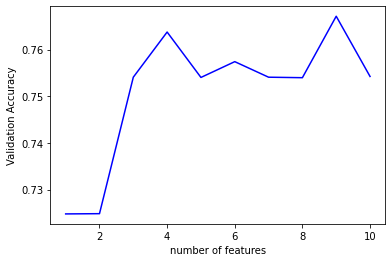

In [13]:
print(removed_features)
print(removed_ks)
print(removed_valid_accu)
print(feature_num)
#insert the case of full feature
feature_num.insert(0,10)
removed_valid_accu.insert(0,valid_accu_full)
removed_ks.insert(0,15)
# plot mean cross-validation accuracy  vs the number of features
plt.plot(feature_num, removed_valid_accu, color = 'blue')
plt.xlabel('number of features')
plt.ylabel('Validation Accuracy')
plt.show()

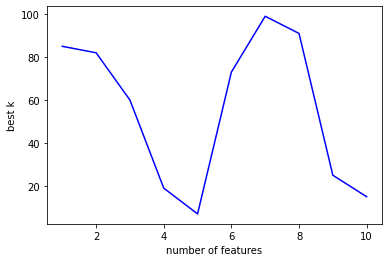

In [14]:
# plot best ks  vs the number of features
plt.plot(feature_num, removed_ks, color = 'blue')
plt.xlabel('number of features')
plt.ylabel('best k')
plt.show()

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization affected your model and its performance? 

Ans: We can see that in this case, standardizing data does not affect the validation accuracy much and the two curves basically overlap each other. When k = 6, standardizing data allows us to get a higher validation accuracy but when k=9 and 4, using the original data gives us a higher accuracy. This is because the original dataset is already standardized but with a different method (mean = 0 but std != 1).

In [15]:
### YOUR CODE HERE ###
from sklearn import preprocessing
import numpy as np
# fit on training set
scaler = preprocessing.StandardScaler().fit(x_train)
# perform on both train and test set
x_train_sd = scaler.transform(x_train)
x_test_sd = scaler.transform(x_test)
# convert back to dataframe
x_train_sd = pd.DataFrame(data = x_train_sd, columns=dataset.feature_names)
x_test_sd = pd.DataFrame(data = x_test_sd, columns=dataset.feature_names)
#check
print(f"Mean after standardization: {x_train_sd['sex'].mean()}")
print(f"Std after standardization: {x_train_sd['sex'].std()}")
x_train_sd

Mean after standardization: 8.048218689839323e-17
Std after standardization: 1.0016220610822995


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.276030,1.042995,0.032288,-0.237005,0.842213,1.212746,-0.834371,1.140402,0.507152,0.643505
1,-0.551330,-0.958778,-1.351539,-2.355554,-1.045506,-0.860014,0.005560,-0.813684,-0.712343,-0.168099
2,0.125601,-0.958778,1.259876,-1.175907,0.522753,1.120624,-0.910729,1.034776,-0.068738,-0.573902
3,0.652103,1.042995,1.192917,1.616726,1.045506,-0.248056,-0.758014,1.449736,2.462620,1.779752
4,0.200816,-0.958778,-0.481067,-0.549972,2.091012,1.989209,1.456350,-0.059210,-0.418556,0.156543
...,...,...,...,...,...,...,...,...,...,...
304,1.479464,1.042995,-0.123951,1.038940,1.277841,-0.083551,-1.139801,2.204210,2.645252,1.130468
305,1.178605,1.042995,-0.614986,0.172261,0.406586,0.456024,0.692777,-0.813684,-0.584239,-1.142025
306,1.253820,-0.958778,-0.414108,1.833396,0.958381,0.673171,-0.987086,1.449736,1.628858,2.672517
307,-1.604334,-0.958778,-1.485458,-1.199982,-1.771552,-1.550934,-0.528942,-0.813684,-0.351838,-1.628988


In [16]:

# call Feature_selector function 
removed_features_sd, removed_ks_sd, removed_valid_accu_sd, valid_accu_full_sd = Feature_selector(x_train_sd, y_train,0.95)
num_removed_sd = len(removed_features_sd)
feature_num_sd = []
num_feature_remain = 9
for i in range (num_removed_sd):
  feature_num_sd.append(num_feature_remain)
  num_feature_remain -= 1
#insert the case of full feature
feature_num_sd.insert(0,10)
removed_valid_accu_sd.insert(0,valid_accu_full_sd)
print(removed_valid_accu_sd)
print(feature_num_sd)

Removed feature :s4
Removed feature :sex
Removed feature :s1
Removed feature :s6
Removed feature :bp
Removed feature :age
Removed feature :s3
Removed feature :bmi
Removed feature :s2
[0.754151242728715, 0.7638286620835537, 0.7539925965097832, 0.7573241671073507, 0.7638286620835537, 0.7540454785827604, 0.7605499735589636, 0.7540983606557378, 0.7281332628239026, 0.7248016922263353]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


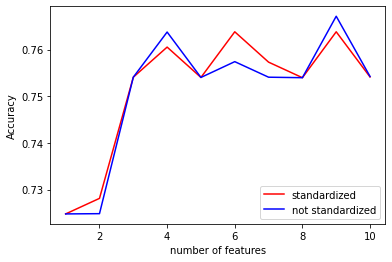

In [17]:

# plot mean cross-validation accuracy  vs the number of features
plt.plot(feature_num_sd, removed_valid_accu_sd, color = 'red',label = 'standardized')
plt.plot(feature_num, removed_valid_accu, color = 'blue',label = 'not standardized')
plt.xlabel('number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 

Ans: The decision tree has a validation score of 0.7313061872025385, which is lower than KNN with a score of 0.754151242728715

In [18]:
### YOUR CODE HERE ###
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':[2,3,4,5,6,7,8], 'min_samples_split': [2,3,4,5,6,7,8]}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters, cv=5)
clf.fit(x_train_sd, y_train) # train on standardized dataset
print(f"The best parameters are :{clf.best_params_}")
print(f"The validation score: {clf.best_score_}")


The best parameters are :{'max_depth': 2, 'min_samples_split': 2}
The validation score: 0.7313061872025385


## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

Ans: The best one is KNN trained on original(unstandardized) training data with 9 features. Below we implement it and run test set. We see that the model is able to arrive at a validation accuracy of 76.72% and a test accuracy of 79.7%. We also compare it with a KNN trained on standardized data with the same 9 features. We see that the model arrives at a validation accuracy of 76.38% and a test accuracy of 76.69%. This is within our expectation since the original dataset is already standardized.

In [19]:
### YOUR CODE HERE ###
#KNN trained with unstandardized data, 9 features
from sklearn.metrics import accuracy_score
x_train = x_train.drop(columns=['s4'])
x_test = x_test.drop(columns=['s4']) #modify the test set as well by dropping the corresponding feature.
k_value, valid_accuracy = run_knn(x_train, y_train)
knn = neighbors.KNeighborsClassifier(n_neighbors=k_value)
scores = cross_validate(knn, x_train, y_train, cv=5, return_train_score=True)

print('Mean Train Accuracy:',scores['train_score'].mean()) # returns the mean cross-validation train score
print('Mean Validation Accuracy:', valid_accuracy)

knn.fit(x_train, y_train)
accuracy = accuracy_score(y_test, knn.predict(x_test))
print ("Test set accuracy: ", accuracy * 100, "%")

Mean Train Accuracy: 0.7669844586652736
Mean Validation Accuracy: 0.7671602326811211
Test set accuracy:  79.69924812030075 %


In [20]:
### YOUR CODE HERE ###
#KNN trained with standardized data, 9 features
x_train_sd = x_train_sd.drop(columns=['s4'])# drop a feature
x_test_sd = x_test_sd.drop(columns=['s4'])

k_value, valid_accuracy = run_knn(x_train_sd, y_train)
knn = neighbors.KNeighborsClassifier(n_neighbors=k_value)
scores = cross_validate(knn, x_train_sd, y_train, cv=5, return_train_score=True)

print('Mean Train Accuracy:',scores['train_score'].mean()) # returns the mean cross-validation train score
print('Mean Validation Accuracy:', valid_accuracy)

knn.fit(x_train_sd, y_train)
accuracy = accuracy_score(y_test, knn.predict(x_test_sd))
print ("Test set accuracy: ", accuracy * 100, "%")




Mean Train Accuracy: 0.7742555831265509
Mean Validation Accuracy: 0.7638286620835537
Test set accuracy:  76.69172932330827 %


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/